# WEEK 13 (22/01/18)

# Done
* Rewrote eps_scale in object-oriented style
* 

### To Do
* Give population all 1 to pull out mass dependencies and plot to see
* Look into pickling the ODM instead of storing it in file

### Questions
* <font color='green'>  </font> 

## 1. Uniform mass distribution

Since we now have too many variables that $\epsilon$ might depend on, let's try and simplify by using a uniform mass distribution ($m_i = 1  \forall i$). This way, we can pick out the mass dependencies by comparing the $\epsilon$ plots to what we did last week (see Notebook *Week 12*).

In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
from hm.analysis.scaling import eps_scale
from hm.analysis.scaling.plots import eps_distance
from matplotlib import pyplot as plt
import pandas

In [26]:
df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/LSOA populations and areas 2011 (merged).csv")
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]
lon_df['TotPop2011'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [23]:
d_max = [300, 500, 700, 1000, 1300]
gamma = 3.49
N = 20 # number of bins

In [12]:
levels = eps_scale.iterate(lon_df, d_max)
level_1 = levels[0]
level_2 = levels[1]
level_3 = levels[2]
level_4 = levels[3]
level_5 = levels[4]

### 1.1 Levels

#### 1.1.1 Level 1

In [14]:
eps_level_1 = eps_scale.epsilon(levels, 1, gamma)

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


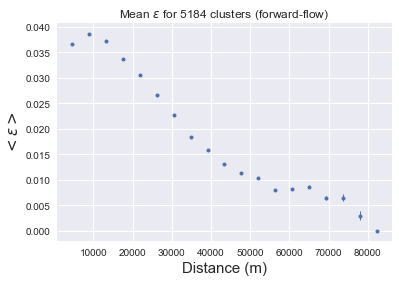

In [30]:
DM = eps_scale.cluster_population(levels[0]).DM
eps_distance(eps_level_1, DM, N)

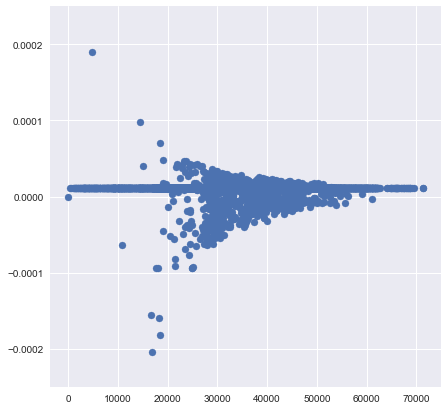

In [16]:
width = 7
height = 7
plt.figure(figsize=(width, height))
x = eps_scale.cluster_population(level_1).DM[100][1:] #distance of location 20 with all the others
y = eps_level_1[100][1:]
plt.ylim(-0.00025, 0.00025)
plt.scatter(x, y)
plt.show()

Something weird here, it looks exactly the same as before. 

Is it actually independent of masses? Or are we doing something wrong? Maybe we can have a look at the ODMs to get a better idea.

#### 1.1.2 Level 2

In [21]:
eps_level_2 = eps_scale.epsilon(levels, 2, gamma)

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


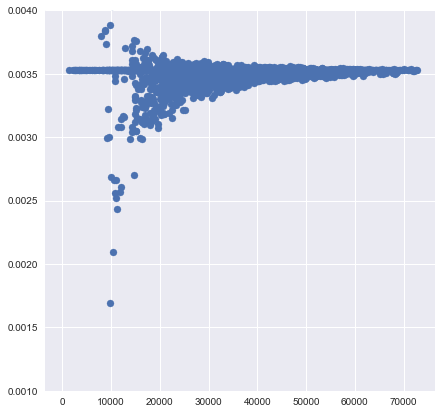

In [22]:
width = 7
height = 7
plt.figure(figsize=(width, height))
x = eps_scale.cluster_population(level_2).DM[100][1:] #distance of location 20 with all the others
y = eps_level_2[100][1:]
plt.ylim(0.001, 0.004)
plt.scatter(x, y)
plt.show()

Looks the same here, too. Let's have a look at the ODMs then.

### 1.3 ODMs with uniform vs non-uniform population

In [31]:
import seaborn as sns; sns.set()

Let's try with level 5 so we don't have too many locations and can visualise better.

#### 1.3.1 Uniform mass

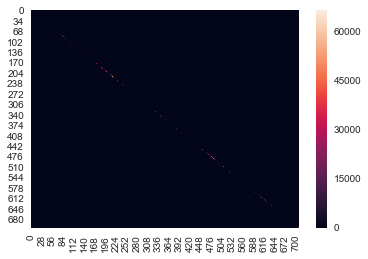

In [40]:
sns.heatmap(eps_scale.reduced_ODM(levels, 5, gamma))
plt.show()

#### 1.3.2 Real mass distribution

In [41]:
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [42]:
levels = eps_scale.iterate(lon_df, d_max)
level_5 = levels[4]
eps_level_2 = eps_scale.epsilon(levels, 5, gamma) # this time with the original mass distribution

/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


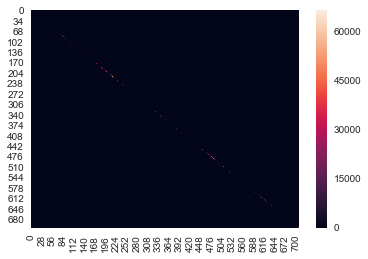

In [43]:
sns.heatmap(eps_scale.reduced_ODM(levels, 5, gamma))
plt.show()